In [2]:
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
# https://www.census.gov/topics/education/educational-attainment/data/tables.2010.List_2016040495.html
from scipy.stats import linregress
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

## Table Clean Up

In [54]:
# Read CSV file in path
wine_df = pd.read_csv(Path('Data/wine_data_given.csv'))

In [55]:
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [30]:
wine_df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
type                      int64
dtype: object

In [6]:
# Find null values
for column in wine_df.columns:
    print(f"Column {column} has {wine_df[column].isnull().sum()} null values")

# Find duplicate entries
print(f"Duplicate entries: {wine_df.duplicated().sum()}")   

Column fixed acidity has 0 null values
Column volatile acidity has 0 null values
Column citric acid has 0 null values
Column residual sugar has 0 null values
Column chlorides has 0 null values
Column free sulfur dioxide has 0 null values
Column total sulfur dioxide has 0 null values
Column density has 0 null values
Column pH has 0 null values
Column sulphates has 0 null values
Column alcohol has 0 null values
Column quality has 0 null values
Column type has 0 null values
Duplicate entries: 1177


## Target Type of Wine

In [9]:
target_type_of_wine = wine_df
target_type_of_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [10]:
target_type_of_wine['type'].value_counts()

white    4898
red      1599
Name: type, dtype: int64

In [11]:

# Transform Previous Customer column
def changeStatus(status):
    if status == "red":
        return 1
    else:
        return 0

# Along with replace() and map(), this is another way to encode the gender column into numbers.
target_type_of_wine['type'] = target_type_of_wine['type'].apply(changeStatus)

In [12]:
target_type_of_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [31]:
target_type_of_wine['type'].value_counts()


0    4898
1    1599
Name: type, dtype: int64

In [23]:
count_red = len(target_type_of_wine[target_type_of_wine['type']==1])
count_white = len(target_type_of_wine[target_type_of_wine['type']==0])
pct_of_red = count_red/(count_red+count_white)
print("percentage of red is", pct_of_red*100)
pct_of_white = count_white/(count_red+count_white)
print("percentage of white", pct_of_white*100)

# Our classes are imbalanced, and the ratio of red to white wine instances is 25:75.
#  Before we go ahead to balance the classes, let’s do some more exploration.

percentage of red is 24.611359088810218
percentage of white 75.38864091118978


In [24]:
X = target_type_of_wine.loc[:, target_type_of_wine.columns != 'type']
y = target_type_of_wine.loc[:, target_type_of_wine.columns == 'type']
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['type'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of white wine in oversampled data",len(os_data_y[os_data_y['type']==0]))
print("Number of red wine",len(os_data_y[os_data_y['type']==1]))
print("Proportion of red wine data in oversampled data is ",len(os_data_y[os_data_y['type']==0])/len(os_data_X))
print("Proportion of white wine data in oversampled data is ",len(os_data_y[os_data_y['type']==1])/len(os_data_X))

length of oversampled data is  6852
Number of white wine in oversampled data 3426
Number of red wine 3426
Proportion of red wine data in oversampled data is  0.5
Proportion of white wine data in oversampled data is  0.5


In [25]:
data_final_vars=target_type_of_wine.columns.values.tolist()
print(data_final_vars)
y=['type']
X=[i for i in data_final_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality', 'type']
[ True  True  True  True  True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1]


C:\Users\sroiz\anaconda3\envs\PythonData\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass n_features_to_select=20 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
C:\Users\sroiz\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [27]:
os_data_X.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [28]:
os_data_y.columns

Index(['type'], dtype='object')

In [32]:
cols=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
    'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
    'pH', 'sulphates', 'alcohol', 'quality']
X=os_data_X[cols]
y=os_data_y['type']

In [33]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.064402
         Iterations 10
                             Results: Logit
Model:                 Logit               Pseudo R-squared:    0.907   
Dependent Variable:    type                AIC:                 906.5602
Date:                  2022-05-09 12:42    BIC:                 988.5478
No. Observations:      6852                Log-Likelihood:      -441.28 
Df Model:              11                  LL-Null:             -4749.4 
Df Residuals:          6840                LLR p-value:         0.0000  
Converged:             1.0000              Scale:               1.0000  
No. Iterations:        10.0000                                          
------------------------------------------------------------------------
                      Coef.   Std.Err.    z     P>|z|   [0.025   0.975] 
------------------------------------------------------------------------
fixed acidity          1.5538   0.1260  12.3290 0.

In [34]:
cols=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
    'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
    'pH', 'sulphates', 'quality']
X=os_data_X[cols]
y=os_data_y['type']

In [35]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.064407
         Iterations 10
                             Results: Logit
Model:                 Logit               Pseudo R-squared:    0.907   
Dependent Variable:    type                AIC:                 904.6333
Date:                  2022-05-09 13:02    BIC:                 979.7886
No. Observations:      6852                Log-Likelihood:      -441.32 
Df Model:              10                  LL-Null:             -4749.4 
Df Residuals:          6841                LLR p-value:         0.0000  
Converged:             1.0000              Scale:               1.0000  
No. Iterations:        10.0000                                          
------------------------------------------------------------------------
                      Coef.   Std.Err.    z     P>|z|   [0.025   0.975] 
------------------------------------------------------------------------
fixed acidity          1.5413   0.1169  13.1903 0.

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\sroiz\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [37]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.98


In [38]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

# The result is telling us that we have 14384 + 16640 correct predictions and 12542 + 18314 incorrect predictions.

[[ 993   21]
 [  24 1018]]


In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1014
           1       0.98      0.98      0.98      1042

    accuracy                           0.98      2056
   macro avg       0.98      0.98      0.98      2056
weighted avg       0.98      0.98      0.98      2056



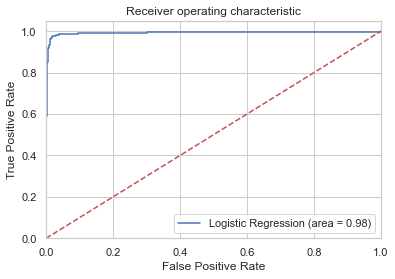

In [40]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# The ROC determines the line is not good at all.

## Target Quality 9 or higher

In [66]:
# Read CSV file in path
wine_df = pd.read_csv(Path('Data/wine_data_given.csv'))

In [67]:
target_type_of_quality = wine_df
target_type_of_quality

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [68]:
target_type_of_quality['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

Wanted to predict 9 and higher, but there is only five of them. Not enough data. Will use 8 and higher to create better predictions. 

In [69]:
# Transform Previous Customer column
def changeStatus(status):
    if status == 8:
        return 1
    elif status == 9:
        return 1
    else:
        return 0

# Along with replace() and map(), this is another way to encode the gender column into numbers.
target_type_of_quality['quality'] = target_type_of_quality['quality'].apply(changeStatus)

In [70]:
target_type_of_quality['quality'].value_counts()

0    6299
1     198
Name: quality, dtype: int64

In [71]:
target_type_of_quality

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,0,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,0,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,0,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,0,white


In [72]:
count_eight_plus = len(target_type_of_quality[target_type_of_quality['quality']==1])
count_seven_lower = len(target_type_of_quality[target_type_of_quality['quality']==0])
pct_of_eight_plus = count_eight_plus/(count_eight_plus+count_seven_lower)
print("percentage of 8 and higher is", pct_of_eight_plus*100)
pct_of_seven_lower = count_seven_lower/(count_eight_plus+count_seven_lower)
print("percentage of lower than 8", pct_of_seven_lower*100)

# Our classes are imbalanced, and the ratio of red to white wine instances is 25:75.
#  Before we go ahead to balance the classes, let’s do some more exploration.

percentage of 8 and higher is 3.047560412498076
percentage of lower than 8 96.95243958750193


In [75]:
data = target_type_of_quality
cat_vars=['type']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1
    
cat_vars=['type']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]
data_final=data[to_keep]
data_final.columns.values

array(['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality', 'type_red', 'type_white'], dtype=object)

In [76]:
data_final

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_red,type_white
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0,1,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0,1,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0,1,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0,1,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,0,0,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,0,0,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,0,0,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,0,0,1


In [77]:
X = data_final.loc[:, data_final.columns != 'quality']
y = data_final.loc[:, data_final.columns == 'quality']
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['quality'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of seven and lower in oversampled data",len(os_data_y[os_data_y['quality']==0]))
print("Number of eight and higher",len(os_data_y[os_data_y['quality']==1]))
print("Proportion of eight and higher data in oversampled data is ",len(os_data_y[os_data_y['quality']==0])/len(os_data_X))
print("Proportion of seven and lower data in oversampled data is ",len(os_data_y[os_data_y['quality']==1])/len(os_data_X))

length of oversampled data is  8812
Number of seven and lower in oversampled data 4406
Number of eight and higher 4406
Proportion of eight and higher data in oversampled data is  0.5
Proportion of seven and lower data in oversampled data is  0.5


In [78]:
data_final_vars=data_final.columns.values.tolist()
print(data_final_vars)
y=['Education']
X=[i for i in data_final_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality', 'type_red', 'type_white']
[ True  True  True  True  True  True  True  True  True  True  True  True
  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1]


C:\Users\sroiz\anaconda3\envs\PythonData\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass n_features_to_select=20 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
C:\Users\sroiz\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [79]:
os_data_X.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'type_red', 'type_white'],
      dtype='object')

In [80]:
os_data_y.columns

Index(['quality'], dtype='object')

In [81]:
cols=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
    'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
    'pH', 'sulphates', 'alcohol', 'type_red', 'type_white']
X=os_data_X[cols]
y=os_data_y['quality']

In [82]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.504424
         Iterations 11
                            Results: Logit
Model:                 Logit              Pseudo R-squared:   0.272    
Dependent Variable:    quality            AIC:                8915.9708
Date:                  2022-05-09 15:17   BIC:                9008.0611
No. Observations:      8812               Log-Likelihood:     -4445.0  
Df Model:              12                 LL-Null:            -6108.0  
Df Residuals:          8799               LLR p-value:        0.0000   
Converged:             1.0000             Scale:              1.0000   
No. Iterations:        11.0000                                         
-----------------------------------------------------------------------
                      Coef.   Std.Err.    z     P>|z|   [0.025   0.975]
-----------------------------------------------------------------------
fixed acidity          0.3110   0.0368   8.4452 0.0000   0.238

In [83]:
cols=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
'free sulfur dioxide', 'total sulfur dioxide', 'density',
    'pH', 'alcohol', 'type_red', 'type_white']
X=os_data_X[cols]
y=os_data_y['quality']

In [84]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.504431
         Iterations 11
                            Results: Logit
Model:                 Logit              Pseudo R-squared:   0.272    
Dependent Variable:    quality            AIC:                8912.1003
Date:                  2022-05-09 15:19   BIC:                8990.0229
No. Observations:      8812               Log-Likelihood:     -4445.1  
Df Model:              10                 LL-Null:            -6108.0  
Df Residuals:          8801               LLR p-value:        0.0000   
Converged:             1.0000             Scale:              1.0000   
No. Iterations:        11.0000                                         
-----------------------------------------------------------------------
                      Coef.   Std.Err.    z     P>|z|   [0.025   0.975]
-----------------------------------------------------------------------
fixed acidity          0.3117   0.0368   8.4710 0.0000   0.239

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\sroiz\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [86]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))



Accuracy of logistic regression classifier on test set: 0.77


In [87]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

# The result is telling us that we have 14384 + 16640 correct predictions and 12542 + 18314 incorrect predictions.

[[ 986  344]
 [ 270 1044]]


In [88]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.79      0.74      0.76      1330
           1       0.75      0.79      0.77      1314

    accuracy                           0.77      2644
   macro avg       0.77      0.77      0.77      2644
weighted avg       0.77      0.77      0.77      2644



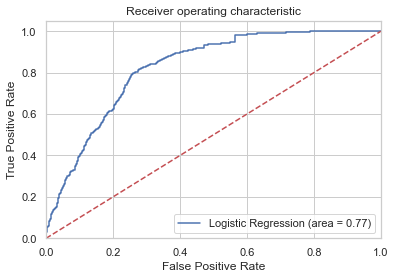

In [89]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# The ROC determines the line is not good at all.

## Images of Data

In [3]:
# Read CSV file in path
wine_df = pd.read_csv(Path('Data/wine_data_given.csv'))

In [4]:
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


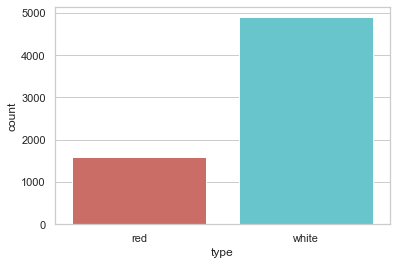

<Figure size 432x288 with 0 Axes>

In [6]:
sns.countplot(x='type', data=wine_df, palette='hls')
plt.show()
plt.savefig('count_type_of_wine.png')

In [8]:
count_male = len(wine_df[wine_df['type']=='red'])
count_female = len(wine_df[wine_df['type']=='white'])
pct_of_male = count_male/(count_male+count_female)
print("percentage of red is", pct_of_male*100)
pct_of_female = count_female/(count_male+count_female)
print("percentage of white", pct_of_female*100)

# Our classes are imbalanced, and the ratio of male to female instances is 49:51.
#  Before we go ahead to balance the classes, let’s do some more exploration.

percentage of red is 24.611359088810218
percentage of white 75.38864091118978


Text(0, 0.5, 'Frequency of Sex')

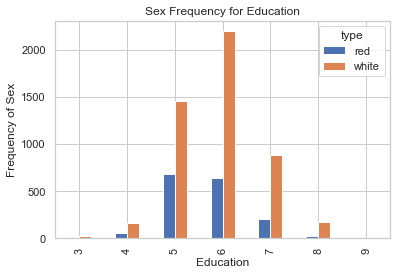

In [11]:
pd.crosstab(wine_df.quality,wine_df.type).plot(kind='bar')
plt.title('Sex Frequency for Education')
plt.xlabel('Education')
plt.ylabel('Frequency of Sex')
# plt.savefig('sex_education_bar')